<a href="https://colab.research.google.com/github/HyunLee103/Pytorch_practice/blob/master/Pytorch_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

## data prepare

In [34]:
# 데이터 정규화 > loss function의 balace를 맞춰 optimization 효율을 높힌다.
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) # ??

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
# torch.utils.data.DataLoader : 각 배치 단위로 데이터와 라벨을 return
# 데이터는 (batch x channel x row x col)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2) 
# num_workers : 데이터 load 때 사용할 subprocess 수 

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2) # testset은 왜 shuffle 안하지?

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [35]:
for data, label in trainloader:
  print(data.shape,label)
  break

torch.Size([4, 3, 32, 32]) tensor([0, 4, 7, 5])


In [0]:
def imshow(img,i):
  img[i] = img[i]/2 + 0.5
  npimg = img[i].numpy()
  plt.imshow(np.transpose(npimg,(1,2,0))) 
  plt.show()
  print(classes[labels[i]])

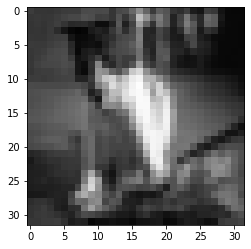

cat


In [37]:
dataiter = iter(trainloader) # iter??
image, labels = dataiter.next()

imshow(image,3)

## modeling

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5) 
    self.pool = nn.MaxPool2d(2,2) 
    self.conv2 = nn.Conv2d(6,16,5) 
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x))) 
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)  # 예측값이 원핫벡터이면, 마지막에 sotfmax 함수를 통과시켜주는게 맞다, 이 경우는 아님
    return x

net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr =0.001)

## traning

In [52]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader): # ?? trainloader가 [inputs, labels] 목록이라 이러면 i,data에 각각 들어가지 않나?
    inputs, labels = data

    optimizer.zero_grad() # gradient 초기화
    
    outputs = net(inputs)
    loss = criterion(outputs,labels) # loss 계산
    loss.backward() # loss gradient 역전파
    optimizer.step() # 가중치 update

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('%d, %d, loss : %.3f'%(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
print('finish')

1, 2000, loss : 1.920
1, 4000, loss : 1.653
1, 6000, loss : 1.546
1, 8000, loss : 1.471
1, 10000, loss : 1.416
1, 12000, loss : 1.404
2, 2000, loss : 1.331
2, 4000, loss : 1.332
2, 6000, loss : 1.301
2, 8000, loss : 1.289
2, 10000, loss : 1.277
2, 12000, loss : 1.259
finish


## predict

In [53]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %
